# Credit Card Fraud Detection

In [2]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [5]:
data = pd.read_csv('creditcard.csv')

## Data Exploration

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Pre-Processing

In [8]:
from sklearn.preprocessing import StandardScaler
data['normalized_amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis=1)

In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [10]:
data = data.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [13]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [15]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [16]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


### Splitting the Dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
X_train.shape

(199364, 29)

In [20]:
X_test.shape

(85443, 29)

In [21]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Developing the Neural Network

In [23]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [25]:
model = Sequential([
    Dense(units = 16, input_dim = 29, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dropout(0.5),
    Dense(20, activation = 'relu'),
    Dense(24, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

# The model consists of a Dropout Layer in between to prevent overfitting

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

### Training the Model

In [28]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0079 - accuracy: 0.9989
Epoch 2/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0041 - accuracy: 0.9994 0s - loss: 0
Epoch 3/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 22s 2ms/step - loss: 0.0034 - accuracy: 0.9993 0s - loss: 0.0034 - accuracy: 0. - ETA: 0s - loss: 0.0034 


### Measuring the Results

In [31]:
score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 8s 3ms/step - loss: 0.0063 - accuracy: 0.9994


As illustrated above, the model developed has an accuracy of 99.94%.

In [43]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [36]:
# Testing the model with test data
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

In [37]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())

In [38]:
print(cnf_matrix)

[[85275    21]
 [   33   114]]


Confusion matrix, without normalization
[[85275    21]
 [   33   114]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

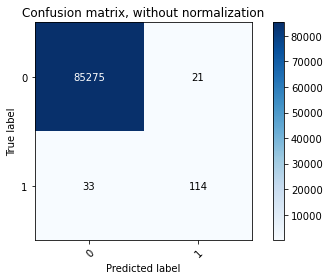

In [45]:
plot_confusion_matrix(cnf_matrix, classes = [0,1])

As illustrated by the confusion matrix above, 85275 Fraudulent Transactions were successfully detected by the model and 114 Non-Fraudulent Transactions were detected. 

However, 33 Fraudulent Transactions were identified as Non-Fraudulent and 21 Non-Fraudulent Transactions were identified as Fraudulent.

Confusion matrix, without normalization
[[284242     73]
 [    99    393]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

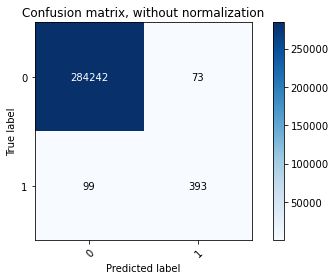

In [48]:
# Testing the model with entire dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Upon testing the model with the entire dataset, 284242 Fraudulent Transactions were successfully detected. Whereas, 99 Fraudulent Transactions were incorrectly identified as Non-Fraudulent.

In order to further minimize the inaccurate results, the steps below would be followed.

## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
random_forest = RandomForestClassifier(n_estimators = 100)

In [54]:
random_forest.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [55]:
y_pred = random_forest.predict(X_test)

In [56]:
random_forest.score(X_test, y_test)

0.9995435553526912

In [57]:
cnf_matrix = confusion_matrix(y_test, y_pred)

Confusion matrix, without normalization
[[85290     6]
 [   33   114]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

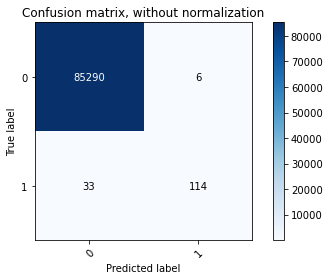

In [58]:
plot_confusion_matrix(cnf_matrix, classes = [0,1])

In [59]:
y_pred = random_forest.predict(X)

In [62]:
cnf_matrix = confusion_matrix(y, y_pred.round())

Confusion matrix, without normalization
[[284309      6]
 [    34    458]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

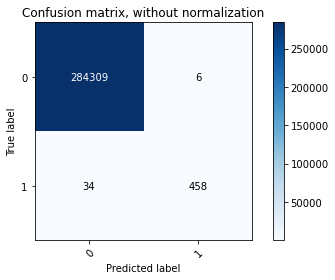

In [63]:
plot_confusion_matrix(cnf_matrix, classes = [0,1])

## Decision Trees

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
decision_tree = DecisionTreeClassifier()

In [67]:
decision_tree.fit(X_train, y_train.ravel())

DecisionTreeClassifier()

In [68]:
y_pred = decision_tree.predict(X_test)

In [69]:
decision_tree.score(X_test,y_test)

0.9992392589211521

In [70]:
y_pred = decision_tree.predict(X)

In [71]:
y_expected = pd.DataFrame(y)

Confusion matrix, without normalization
[[284286     29]
 [    36    456]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

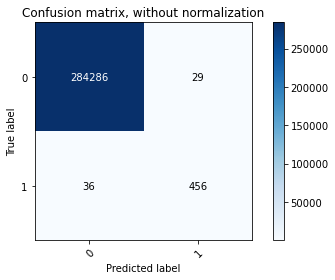

In [72]:
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes = [0,1])

### Undersampling

In [73]:
fraud_indices = np.array(data[data.Class == 1].index)
num_fraud_records = len(fraud_indices)
print(num_fraud_records)

492


In [74]:
normal_indices = data[data.Class == 0].index

In [77]:
random_normal_indices = np.random.choice(normal_indices, num_fraud_records, replace=False)
random_normal_indices = np.array(random_normal_indices)
len(random_normal_indices)

492

In [79]:
undersample_indices = np.concatenate([fraud_indices, random_normal_indices])
len(undersample_indices)

984

In [80]:
undersample_data = data.iloc[undersample_indices,:]

In [81]:
X_undersample = undersample_data.iloc[:, undersample_data.columns != 'Class']
y_undersample = undersample_data.iloc[:, undersample_data.columns == 'Class']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3)

In [83]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

In [85]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
46/46 [==============================] - 2s 2ms/step - loss: 0.7994 - accuracy: 0.9084
Epoch 2/5
46/46 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.9215
Epoch 3/5
46/46 [==============================] - 0s 1ms/step - loss: 0.2030 - accuracy: 0.9331
Epoch 4/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.9360
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.9404


Confusion matrix, without normalization
[[145   1]
 [ 17 133]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

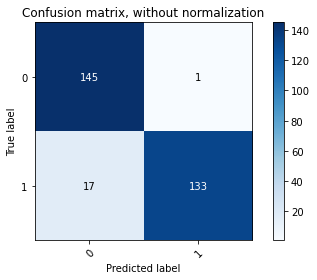

In [86]:
# Testing the model with test data
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Confusion matrix, without normalization
[[283801    514]
 [    57    435]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

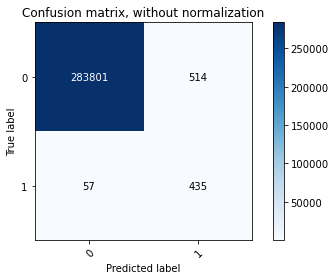

In [87]:
# Testing the model with entire dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

### SMOTE

In [90]:
from imblearn.over_sampling import SMOTE

In [93]:
oversample = SMOTE()
X_resample, y_resample = oversample.fit_resample(X, y)

In [94]:
X_resample = pd.DataFrame(X_resample)
y_resample = pd.DataFrame(y_resample)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3)

In [96]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [97]:
# Training new/oversampled dataset
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
26537/26537 [==============================] - 37s 1ms/step - loss: 0.0265 - accuracy: 0.9911
Epoch 2/5
26537/26537 [==============================] - 42s 2ms/step - loss: 0.0110 - accuracy: 0.9971
Epoch 3/5
26537/26537 [==============================] - 44s 2ms/step - loss: 0.0086 - accuracy: 0.9979 0s
Epoch 4/5
26537/26537 [==============================] - 41s 2ms/step - loss: 0.0070 - accuracy: 0.9983 0s - loss: 0.0070 - 
Epoch 5/5
26537/26537 [==============================] - 46s 2ms/step - loss: 0.0069 - accuracy: 0.9985


Confusion matrix, without normalization
[[85007   246]
 [   64 85272]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

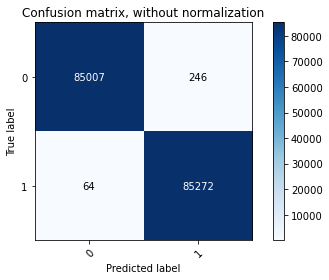

In [98]:
# Testing the model with test data
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

Confusion matrix, without normalization
[[283587    728]
 [     1    491]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

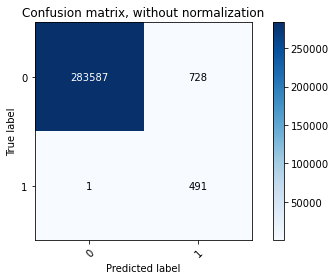

In [100]:
# Testing the model with entire dataset
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])

The Confusion Matrix above shows the final result of the transactions detected. As shown above, 283587 Fraudulent Transactions were successfully identified as Fraudulent and only 1 False-Positive is present. This proves the Fraud Detection model to be vastly accurate and successful in identifying Fraudulent Transactions.

This model could be implemented within a website in order to identify and prevent Fraudulent Credit Card Transactions.